In [30]:
pip install numpy pandas scikit-learn nltk matplotlib seaborn

In [31]:
import pandas as pd

data = pd.read_csv('/content/sample_data/imdb_top_1000.csv')
data.head()
print(data.head())

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
#download necessary NLTK dtasets
nltk.download('punkt')
nltk.download('stopwords')
#Example of a preprocesssing function
def preprocess_text(text):
  #Lowercase the text
  text = text.lower()

  #remove special characters, numbers
  text = re.sub(r'\W', '', text)

  #Tokenize the text
  tokens = word_tokenize(text)

  #Remove stopwords
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [word for word in tokens if word not in stop_words]

  return ' '.join(filtered_tokens)

  #Apply preprocessing to the dataset
  data['cleaned_reviews'] = data['review'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [32]:
pip install scikit-learn

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

#Fit and transform the preprocessed text data
X = tfidf_vectorizer.fit_transform(data['Genre'])
print(X)

  (0, 6)	1.0
  (1, 6)	0.4587641481519396
  (1, 5)	0.8885580770948094
  (2, 6)	0.33706836522201766
  (2, 5)	0.652851404491122
  (2, 0)	0.6783582835202396
  (3, 6)	0.4587641481519396
  (3, 5)	0.8885580770948094
  (4, 6)	0.4587641481519396
  (4, 5)	0.8885580770948094
  (5, 6)	0.3334973393841596
  (5, 0)	0.6711715071635197
  (5, 1)	0.6620485877906062
  (6, 6)	0.4587641481519396
  (6, 5)	0.8885580770948094
  (7, 6)	0.2545976596856819
  (7, 3)	0.6175938148655292
  (7, 11)	0.744149119143748
  (8, 0)	0.4146852437457747
  (8, 1)	0.40904862180421186
  (8, 18)	0.5747675067449369
  (8, 9)	0.5747675067449369
  (9, 6)	1.0
  (10, 6)	0.3334973393841596
  (10, 0)	0.6711715071635197
  :	:
  (991, 1)	0.4911670856914942
  (991, 4)	0.4589687419707524
  (991, 21)	0.7403395084872273
  (992, 1)	0.4501678613275602
  (992, 2)	0.5983685590359726
  (992, 7)	0.6628000936820877
  (993, 6)	0.28488967425668843
  (993, 20)	0.6422272141549435
  (993, 15)	0.7116052830753143
  (994, 4)	0.34727653917745593
  (994, 13)	0.6

In [36]:
from sklearn.model_selection import train_test_split
print(data.columns)
#Check for missing values in the 'Director' column
print(data['Director'].isnull().sum())
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['Director'], test_size=0.2, random_state=42)


Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')
0


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Initialize the model
model = LogisticRegression()

#Train the model
model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = model.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.045


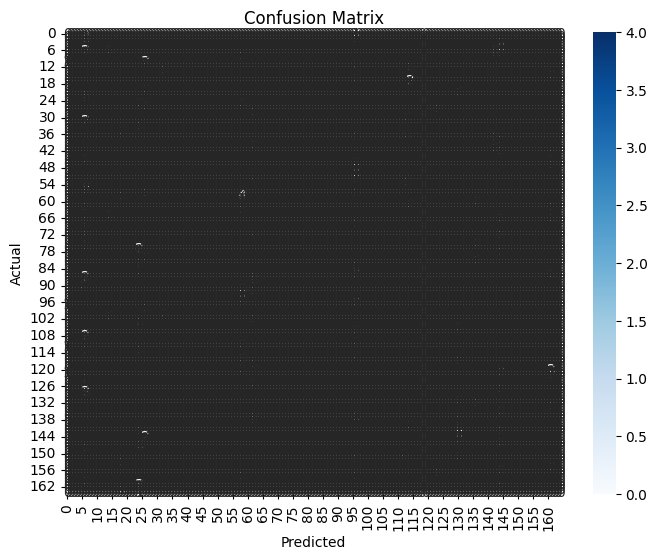

In [39]:
#Plotting confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)

#Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
  #Classification report
print(classification_report(y_test, y_pred))

                                  precision    recall  f1-score   support

                  Akira Kurosawa       0.00      0.00      0.00         1
              Alejandro Amenábar       0.00      0.00      0.00         1
           Alejandro G. Iñárritu       0.00      0.00      0.00         2
                    Alex Garland       0.00      0.00      0.00         1
                     Alex Proyas       0.00      0.00      0.00         1
                  Alfonso Cuarón       0.00      0.00      0.00         1
                Alfred Hitchcock       0.06      0.50      0.11         4
                Andrei Tarkovsky       0.00      0.00      0.00         2
                  Andrew Stanton       0.00      0.00      0.00         1
              Andrey Zvyagintsev       0.00      0.00      0.00         1
                   Anthony Russo       0.00      0.00      0.00         4
                   Antoine Fuqua       0.00      0.00      0.00         1
              Ashutosh Gowariker     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_